# Exploratory Data Analysis

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [15]:
Forest=pd.read_csv(r"C:\Users\annie\DS\VScode\Capstone Project 2\forest.csv")
Grass=pd.read_csv(r"C:\Users\annie\DS\VScode\Capstone Project 2\grassland.csv")

## 1. Temporal Analysis

### a. Seasonal Trends
Analyze the Date and Year columns to detect patterns in bird sightings across different seasons or years.

In [16]:
# Converting the 'Date' column to datetime format
Forest['Date']=pd.to_datetime(Forest['Date'])
Grass['Date']=pd.to_datetime(Grass['Date'])

In [17]:
# Extracting the month from the 'Date' column and creating a new column 'Month'
Forest['Month']=Forest['Date'].dt.month
Grass['Month']=Grass['Date'].dt.month

In [18]:
# Creating a function to categorize months into seasons
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'

# Applying the function to create a new column 'season'
Forest['season']=Forest['Month'].apply(get_season)
Grass['season']=Grass['Month'].apply(get_season)

In [19]:
Forest['season'].unique()

array(['Spring', 'Summer'], dtype=object)

In [20]:
Grass['season'].unique()

array(['Spring', 'Summer'], dtype=object)

In [21]:
#Count in each season
seasonal_forest = Forest['season'].value_counts()
seasonal_grassland = Grass['season'].value_counts()
print(seasonal_forest)
print(seasonal_grassland)

season
Summer    6136
Spring    2374
Name: count, dtype: int64
season
Summer    4342
Spring    2465
Name: count, dtype: int64


Visualization Plot

In [22]:
import plotly.express as px

# Forest plot
fig_forest = px.bar(
    x=seasonal_forest.index,
    y=seasonal_forest.values,
    labels={'x': 'Season', 'y': 'Counts of Bird Sightings'},
    color=seasonal_forest.index,
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Bird Observations Across Seasons - (Forest)'
)

fig_forest.update_layout(showlegend=False)
fig_forest.show()


In [23]:
# Grassland plot
fig_grassland = px.bar(
    x=seasonal_grassland.index,
    y=seasonal_grassland.values,
    labels={'x': 'Season', 'y': 'Counts of Bird Sightings'},
    color=seasonal_grassland.index,
    color_discrete_sequence=px.colors.qualitative.Bold,
    title='Bird Observations Across Seasons - (Grassland)'
)

fig_grassland.update_layout(showlegend=False)
fig_grassland.show()


### b. Observation Time
Study the Start_Time and End_Time to determine if specific time windows correlate with higher bird activity.

In [24]:
# Converting the 'Start_Time' and 'End_Time' column to datetime format
Forest['Start_Time']=pd.to_datetime(Forest['Start_Time'],format="%H:%M:%S")
Forest['End_Time']=pd.to_datetime(Forest['End_Time'],format="%H:%M:%S")

Grass['Start_Time_hour']=pd.to_datetime(Grass['Start_Time'],format="%H:%M:%S")
Grass['End_Time']=pd.to_datetime(Grass['End_Time'],format="%H:%M:%S")

In [25]:
# Ensure 'Start_Time' and 'End_Time' columns are in datetime format for both DataFrames
Grass['Start_Time'] = pd.to_datetime(Grass['Start_Time'], format="%H:%M:%S", errors='coerce')
Grass['End_Time'] = pd.to_datetime(Grass['End_Time'], format="%H:%M:%S", errors='coerce')

# Extracting the hour from the 'Start_Time' and 'End_Time' columns and creating new columns 'Start_Time_hour' and 'End_Time_hour'
Forest['Start_Time_hour'] = Forest['Start_Time'].dt.hour
Forest['End_Time_hour'] = Forest['End_Time'].dt.hour

Grass['Start_Time_hour'] = Grass['Start_Time'].dt.hour
Grass['End_Time_hour'] = Grass['End_Time'].dt.hour

In [26]:
Forest.head()

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Month,season,Start_Time_hour,End_Time_hour
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,1900-01-01 06:19:00,1900-01-01 06:29:00,Elizabeth Oswald,1,...,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,5,Spring,6,6
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,1900-01-01 06:19:00,1900-01-01 06:29:00,Elizabeth Oswald,1,...,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,5,Spring,6,6
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,1900-01-01 06:19:00,1900-01-01 06:29:00,Elizabeth Oswald,1,...,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,5,Spring,6,6
3,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,1900-01-01 06:19:00,1900-01-01 06:29:00,Elizabeth Oswald,1,...,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,5,Spring,6,6
4,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,1900-01-01 06:19:00,1900-01-01 06:29:00,Elizabeth Oswald,1,...,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,5,Spring,6,6


In [27]:
Grass.head()

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,...,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt,Month,season,Start_Time_hour,End_Time_hour
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,1900-01-01 05:35:00,1900-01-01 05:45:00,Elizabeth Oswald,1.0,0-2.5 min,...,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,5,Spring,5,5
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,1900-01-01 05:35:00,1900-01-01 05:45:00,Elizabeth Oswald,1.0,7.5 - 10 min,...,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False,5,Spring,5,5
2,ANTI,ANTI-0054,Grassland,2018,2018-05-22,1900-01-01 05:35:00,1900-01-01 05:45:00,Elizabeth Oswald,1.0,0-2.5 min,...,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,5,Spring,5,5
3,ANTI,ANTI-0054,Grassland,2018,2018-05-22,1900-01-01 05:35:00,1900-01-01 05:45:00,Elizabeth Oswald,1.0,0-2.5 min,...,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,5,Spring,5,5
4,ANTI,ANTI-0054,Grassland,2018,2018-05-22,1900-01-01 05:35:00,1900-01-01 05:45:00,Elizabeth Oswald,1.0,0-2.5 min,...,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,5,Spring,5,5


In [28]:
# Finding how many times each hour appears and Sorts the counts by the hour in ascending order
forest_start_distribution = Forest["Start_Time_hour"].value_counts().sort_index()
forest_end_distribution = Forest["End_Time_hour"].value_counts().sort_index()
grassland_start_distribution  = Grass["Start_Time_hour"].value_counts().sort_index()
grassland_end_distribution = Grass["End_Time_hour"].value_counts().sort_index()

print(forest_start_distribution.head())
print(forest_end_distribution.head())
print(grassland_start_distribution.head())
print(grassland_end_distribution.head())

Start_Time_hour
5     633
6    2282
7    2321
8    1910
9     972
Name: count, dtype: int64
End_Time_hour
5     315
6    2206
7    2340
8    1968
9    1189
Name: count, dtype: int64
Start_Time_hour
5     652
6    1544
7    1678
8    1274
9    1034
Name: count, dtype: int64
End_Time_hour
5     373
6    1523
7    1711
8    1305
9    1120
Name: count, dtype: int64


Visualization Plot

In [29]:
# generate hour_labels for the x-axis
hour_labels = [f"{h} AM" if h < 12 else ("12 PM" if h == 12 else f"{h-12} PM") for h in range(24)]

In [30]:
import plotly.graph_objects as go

# Forest plot
fig_forest = go.Figure()

fig_forest.add_trace(go.Scatter(
    x=forest_start_distribution.index,
    y=forest_start_distribution.values,
    mode='lines+markers',
    name='Forest Start Time',
    line=dict(color='red', dash='dash'),
    marker=dict(symbol='triangle-down')
))

fig_forest.add_trace(go.Scatter(
    x=forest_end_distribution.index,
    y=forest_end_distribution.values,
    mode='lines+markers',
    name='Forest End Time',
    line=dict(color='orange'),
    marker=dict(symbol='circle'),
    opacity=0.7
))

fig_forest.update_layout(
    title="Forest: Bird Observation Trends by Time of Day",
    xaxis=dict(title='Time of Day', tickmode='array', tickvals=list(range(24)), ticktext=hour_labels),
    yaxis_title='Number of Observations',
    legend=dict(x=0.7, y=1.1),
    template='plotly_white',
    height=500, width=600
)

fig_forest.show()


In [31]:
# Grassland plot
fig_grass = go.Figure()

fig_grass.add_trace(go.Scatter(
    x=grassland_start_distribution.index,
    y=grassland_start_distribution.values,
    mode='lines+markers',
    name='Grassland Start Time',
    line=dict(color='green', dash='dash'),
    marker=dict(symbol='triangle-down')
))

fig_grass.add_trace(go.Scatter(
    x=grassland_end_distribution.index,
    y=grassland_end_distribution.values,
    mode='lines+markers',
    name='Grassland End Time',
    line=dict(color='blue'),
    marker=dict(symbol='square'),
    opacity=0.7
))

fig_grass.update_layout(
    title="Grassland: Bird Observation Trends by Time of Day",
    xaxis=dict(title='Time of Day', tickmode='array', tickvals=list(range(24)), ticktext=hour_labels),
    yaxis_title='Number of Observations',
    legend=dict(x=0.7, y=1.1),
    template='plotly_white',
    height=500, width=600
)

fig_grass.show()


## 2. Spatial Analysis

### a. Location Insights
Group data by Location_Type (e.g., Grassland) to identify biodiversity hotspots.

In [32]:
# Concatenating the two DataFrames
combined_df = pd.concat([Forest,Grass])

In [33]:
# Grouping by 'Location_Type' and counting the number of occurrences
location_counts = combined_df["Location_Type"].value_counts()

In [34]:
location_counts

Location_Type
Forest       8510
Grassland    6807
Name: count, dtype: int64

In [35]:
import plotly.graph_objects as go

colors = ["pink", "purple"]
fig = go.Figure(data=[go.Pie(
    labels=location_counts.index,
    values=location_counts.values,
    textinfo='percent',
    marker=dict(colors=colors),
    hoverinfo='label+percent',
    textfont=dict(size=14),
)])

fig.update_layout(
    title="Bird Observations by Location Type",
    showlegend=True
)

fig.show()


### b. Plot-Level Analysis
Compare observations across different Plot_Name to see which plots attract more species or specific kinds of birds.

In [36]:
top_n = 10
forest_top_plots = Forest['Plot_Name'].value_counts().nlargest(top_n)
grassland_top_plots = Grass['Plot_Name'].value_counts().nlargest(top_n)

Visualization Plot

In [37]:
# Forest plot

import plotly.express as px

# Create the bar chart for Forest using Plotly
fig = px.bar(
    x=forest_top_plots.index,
    y=forest_top_plots.values,
    labels={'x': 'Plot Name', 'y': 'Observation Count'},
    title="Top 10 Most Observed Plots (Forest)",
    color=forest_top_plots.values,
    color_continuous_scale="Turbo"  # Bright palette
)

fig.update_layout(
    xaxis_tickangle=45,  # Rotate x-axis labels
)

fig.show()

In [38]:
# Grassland plot

import plotly.express as px

# Create the bar chart for Grassland using Plotly
fig = px.bar(
    x=grassland_top_plots.index,
    y=grassland_top_plots.values,
    labels={'x': 'Plot Name', 'y': 'Observation Count'},
    title="Top 10 Most Observed Plots (Grassland)",
    color=grassland_top_plots.values,
    color_continuous_scale="viridis"
)

fig.update_layout(
    xaxis_tickangle=45,  # Rotate x-axis labels
)

fig.show()

## 3. Species Analysis

#### a. Diversity Metrics
Count unique species (Scientific_Name) observed and their distribution across Location_Type.

In [39]:
combined_df = pd.concat([Forest, Grass])
species_count=combined_df['Scientific_Name'].nunique()
location_species = combined_df.groupby("Location_Type")["Scientific_Name"].nunique()

Visualisation Plot

In [40]:
import plotly.graph_objects as go

# Create the bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(
        x=location_species.index,
        y=location_species.values,
        marker=dict(color=['cyan', 'purple']),
    )
])

fig.update_layout(
    title="Unique Species Count by Location Type",
    xaxis_title="Location Type",
    yaxis_title="Unique Species Count",
    xaxis_tickangle=45,  # Optional: rotate x-axis labels if needed
    template="plotly_white",
    yaxis=dict(gridcolor='rgba(0, 0, 0, 0.1)'),
    plot_bgcolor="white",
)

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(0, 0, 0, 0.1)')

fig.show()


### b. Activity Patterns
Check the Interval_Length and ID_Method columns to identify the most common activity types (e.g., Singing).


In [41]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Create a subplot grid (2x2)
fig = sp.make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Forest - Most Common Interval Length(FOREST)",
        "Grassland - Most Common Interval Length(GRASS)",
        "Forest - Most Common Identification Method(FOREST)",
        "Grassland - Most Common Identification Method(GRASS)"
    ),
)

# Forest Interval Length
forest_interval_counts = Forest['Interval_Length'].value_counts()
fig.add_trace(
    go.Bar(
        x=forest_interval_counts.index,
        y=forest_interval_counts.values,
        marker=dict(color='cyan'),
        name="Forest Interval Length"
    ),
    row=1, col=1
)

# Grassland Interval Length
grassland_interval_counts = Grass['Interval_Length'].value_counts()
fig.add_trace(
    go.Bar(
        x=grassland_interval_counts.index,
        y=grassland_interval_counts.values,
        marker=dict(color='cyan'),
        name="Grassland Interval Length"
    ),
    row=1, col=2
)

# Forest ID Method
forest_id_method_counts = Forest['ID_Method'].value_counts()
fig.add_trace(
    go.Bar(
        x=forest_id_method_counts.index,
        y=forest_id_method_counts.values,
        marker=dict(color='purple'),
        name="Forest ID Method"
    ),
    row=2, col=1
)

# Grassland ID Method
grassland_id_method_counts = Grass['ID_Method'].value_counts()
fig.add_trace(
    go.Bar(
        x=grassland_id_method_counts.index,
        y=grassland_id_method_counts.values,
        marker=dict(color='purple'),
        name="Grassland ID Method"
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=700,  # Adjust height as needed
    title_text="Analysis of Interval Length and ID Method in Forest and Grassland",
    showlegend=False,
)

# Update axis labels and titles
fig.update_xaxes(title_text="Interval Length", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.update_xaxes(title_text="Interval Length", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)

fig.update_xaxes(title_text="ID Method", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=1)

fig.update_xaxes(title_text="ID Method", row=2, col=2)
fig.update_yaxes(title_text="Count", row=2, col=2)

# Show the plot
fig.show()

## 4. Environmental Conditions

### a.Weather Correlation
Explore how Temperature, Humidity, Sky, and Wind impact observations, such as the number of birds or their distances.

In [42]:
# Correlation in Forest Data
label_enc = LabelEncoder()
Forest['Common_Name'] = label_enc.fit_transform(Forest['Common_Name'])
Forest['Sky'] = label_enc.fit_transform(Forest['Sky'])
Forest['Wind'] = label_enc.fit_transform(Forest['Wind'])

numeric_cols = ['Temperature', 'Humidity', 'Sky', 'Wind', 'Common_Name']

In [43]:
# Correlation in Grassland Data
label_enc = LabelEncoder()
Grass['Common_Name'] = label_enc.fit_transform(Grass['Common_Name'])
Grass['Sky'] = label_enc.fit_transform(Grass['Sky'])
Grass['Wind'] = label_enc.fit_transform(Grass['Wind'])

numeric_cols = ['Temperature', 'Humidity', 'Sky', 'Wind', 'Common_Name']

Visualization Plot

In [44]:
# Forest plot
import plotly.graph_objects as go
import pandas as pd

# Compute correlation matrix
corr_matrix = Forest[numeric_cols].corr().round(2)

# Create interactive heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    text=corr_matrix.values,
    hovertemplate='Correlation between %{x} and %{y}: %{z}<extra></extra>',
    showscale=True
))

fig.update_layout(
    title="Correlation Heatmap: Weather Factors & Bird Observations (FOREST_LAND)",
    width=800,
    height=800
)

fig.show()


In [45]:
# Grassland plot
import plotly.graph_objects as go
import pandas as pd

# Compute correlation matrix
corr_matrix = Grass[numeric_cols].corr().round(2)

# Create interactive Plotly heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    text=corr_matrix.values,
    hovertemplate='Correlation between %{x} and %{y}: %{z}<extra></extra>',
    showscale=True
))

fig.update_layout(
    title="Correlation Heatmap: Weather Factors & Bird Observations (GRASSLAND)",
    width=800,
    height=800
)

fig.show()


### b. Disturbance Effect
Assess the impact of Disturbance (e.g., slight effect) on bird sightings.

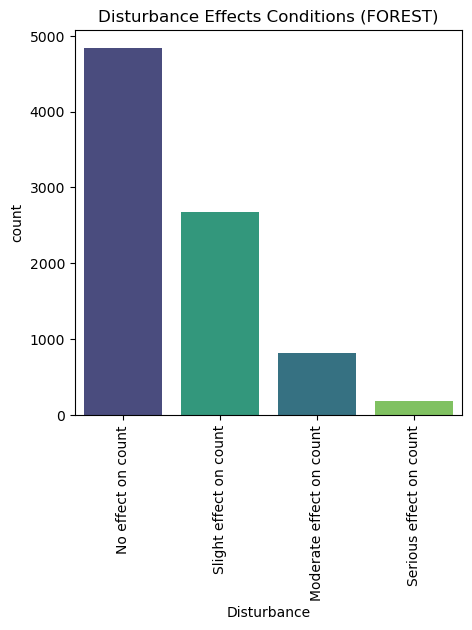

In [46]:
# Forest Plot

plt.figure(figsize=(5, 5))
sns.countplot(
    data=Forest,
    x="Disturbance",
    hue="Disturbance",  # Explicitly using hue
    order=Forest["Disturbance"].value_counts().index,
    palette="viridis",
    legend=False  # Hide redundant legend
)
plt.title("Disturbance Effects Conditions (FOREST)")
plt.xticks(rotation=90)
plt.show()

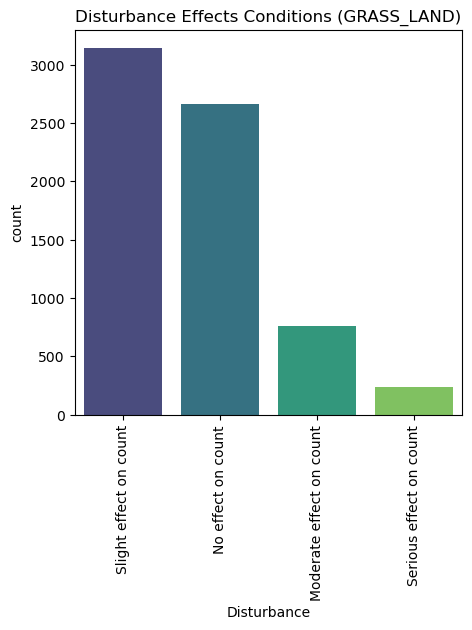

In [47]:
# Grassland plot

plt.figure(figsize=(5, 5))
sns.countplot(
    data=Grass,
    x="Disturbance",
    hue="Disturbance",  # Explicitly assign the same column to hue
    order=Grass["Disturbance"].value_counts().index,
    palette="viridis",
    legend=False  # Hide duplicate legend
)
plt.title("Disturbance Effects Conditions (GRASS_LAND)")
plt.xticks(rotation=90)
plt.show()


## 5. Distance and Behavior

### a. Distance Analysis
Evaluate the Distance column to identify species typically observed closer or farther from the observer.

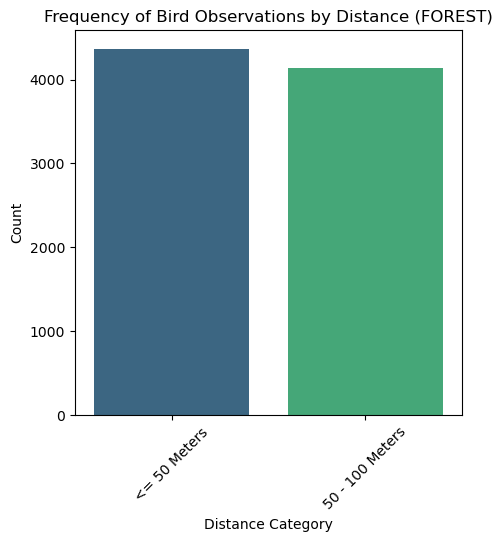

In [48]:
#Forest Plot

plt.figure(figsize=(5, 5))
sns.countplot(
    data=Forest,
    x="Distance",
    hue="Distance",  # Explicitly assign the same column to hue
    order=Forest["Distance"].value_counts().index,
    palette="viridis",  # Apply the color palette
    legend=False  # Hide the legend as it's redundant
)
plt.title("Frequency of Bird Observations by Distance (FOREST)")
plt.xlabel("Distance Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


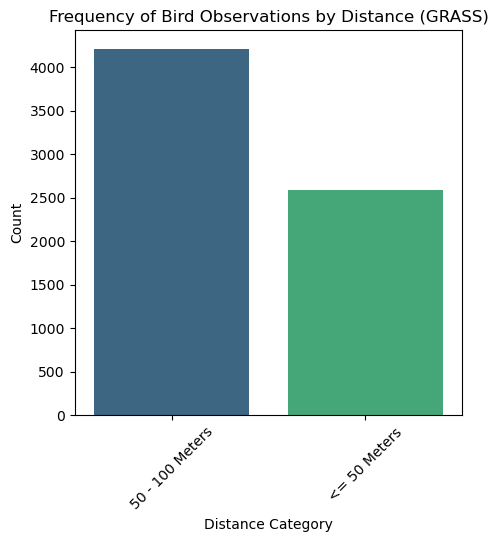

In [49]:
# Grassland plot

plt.figure(figsize=(5, 5))
sns.countplot(
    data=Grass,
    x="Distance",
    hue="Distance",  # Explicitly assign the same column to hue
    order=Grass["Distance"].value_counts().index,
    palette="viridis",  # Apply the color palette
    legend=False  # Hide the legend as it's redundant
)
plt.title("Frequency of Bird Observations by Distance (GRASS)")
plt.xlabel("Distance Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### b. Flyover Frequency
Examine the Flyover_Observed column to detect trends in bird behavior during observation.

In [50]:
#Forest Plot
import plotly.express as px

# Calculate the value counts for the 'Flyover_Observed' column
flyover_counts = Forest["Flyover_Observed"].value_counts()

# Define the explode effect (e.g., pull the first slice out)
pull = [0.1, 0]  # Exploding the first slice by 0.1

# Create Plotly pie chart with explode effect
fig = px.pie(
    names=flyover_counts.index,
    values=flyover_counts.values,
    color=flyover_counts.index,
    color_discrete_map={flyover_counts.index[0]: "lightcoral", flyover_counts.index[1]: "yellowgreen"},  # Assigning colors
    title="Proportion of Flyover Observations (FOREST)",
    labels={"value": "Proportion"}
)

# Apply the explode effect using `pull`
fig.update_traces(pull=pull, textinfo='percent+label', textfont_size=15)

# Hide the legend for cleaner visualization
fig.update_layout(showlegend=False)

fig.show()


In [51]:
# Grassland plot

import plotly.express as px

# Calculate the value counts for the 'Flyover_Observed' column in Grass
flyover_counts = Grass["Flyover_Observed"].value_counts()

# Define the explode effect (e.g., pulling the first slice out)
pull = [0.1, 0]  # Exploding the first slice by 0.1

# Create Plotly pie chart with explode effect
fig = px.pie(
    names=flyover_counts.index,
    values=flyover_counts.values,
    color=flyover_counts.index,
    color_discrete_map={flyover_counts.index[0]: "purple", flyover_counts.index[1]: "pink"},  # Assigning colors
    title="Proportion of Flyover Observations (GRASS)",
    labels={"value": "Proportion"}
)

# Apply the explode effect using the `pull` parameter
fig.update_traces(pull=pull, textinfo='percent+label', textfont_size=15)

# Hide the legend for cleaner visualization
fig.update_layout(showlegend=False)

fig.show()


## 6. Observer Trends

### a. Observer Bias
Analyze data by Observer to check if specific individuals report more observations or certain species.

In [52]:
#Forest plot

import plotly.express as px
import seaborn as sns  # Import seaborn for color palettes

# Create Plotly bar plot for Observer in Forest with color palette
mycolor = sns.color_palette("Dark2")[5]  # Use seaborn's color_palette

fig = px.bar(
    Forest,
    x="Observer",
    color="Observer",  # Color bars by the "Observer" column
    category_orders={"Observer": Forest["Observer"].value_counts().index},
    title="Number of Observations by Each Observer (FOREST)",
    labels={"Observer": "Observer", "value": "Count of Observations"},
    color_discrete_sequence=[mycolor]  # Use a predefined Plotly color sequence
)

# Update layout and axes for better visibility
fig.update_layout(
    xaxis_title="Observer",
    yaxis_title="Count of Observations",
    xaxis_tickangle=45,
    width=600,
    height=500,
    showlegend=False,  # Hide the legend for clarity
    plot_bgcolor='white'
)

fig.show()


In [53]:
# Grassland plot

import plotly.express as px

# Create Plotly bar plot for Observer in Gross with color palette
fig = px.bar(
    Grass,
    x="Observer",
    color="Observer",  # Color bars by the "Observer" column
    category_orders={"Observer": Grass["Observer"].value_counts().index},
    color_discrete_sequence=px.colors.sequential.Viridis_r,  # Apply the "coolwarm" color palette
    title="Number of Observations by Each Observer (GRASS)",
    labels={"Observer": "Observer", "value": "Count of Observations"}
)

# Update layout and axes for better visibility
fig.update_layout(
    xaxis_title="Observer",
    yaxis_title="Count of Observations",
    xaxis_tickangle=45,
    width=800,  # Increased width for better spacing
    height=500,
    showlegend=True,  # Hide the legend for clarity
    plot_bgcolor='white'
)

fig.show()


Forest Plot

In [54]:
# Get the top 10 most observed bird species
top_species = Forest["Common_Name"].value_counts().head(10).index

# Filter dataset to include only these species
filtered_df = Forest[Forest["Common_Name"].isin(top_species)]

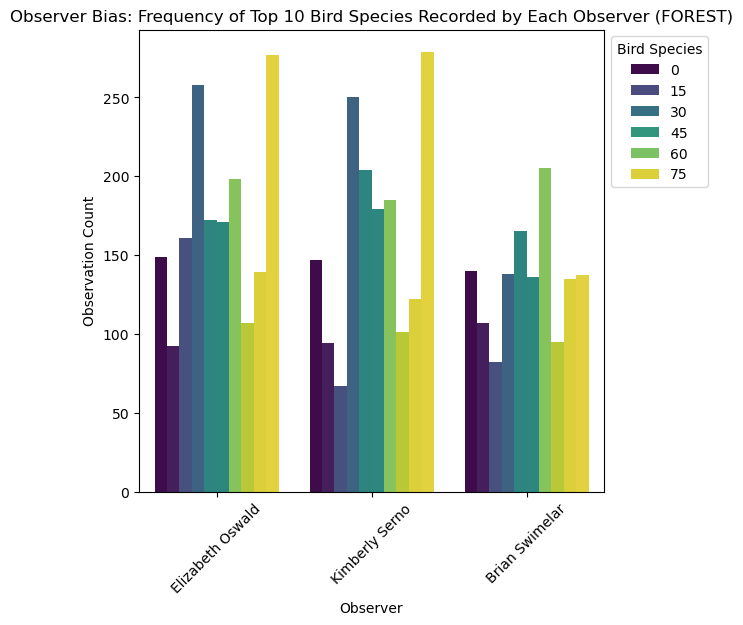

In [55]:
# Plot the observer bias for these top species
plt.figure(figsize=(6, 6))
sns.countplot(data=filtered_df, x="Observer", hue="Common_Name", palette="viridis")

# Formatting the plot
plt.title("Observer Bias: Frequency of Top 10 Bird Species Recorded by Each Observer (FOREST)")
plt.xlabel("Observer")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.legend(title="Bird Species", bbox_to_anchor=(1, 1))
plt.show()

Grassland Plot

In [56]:
# Get the top 10 most observed bird species
top_species = Grass["Common_Name"].value_counts().head(10).index

# Filter dataset to include only these species
filtered_df = Grass[Grass["Common_Name"].isin(top_species)]

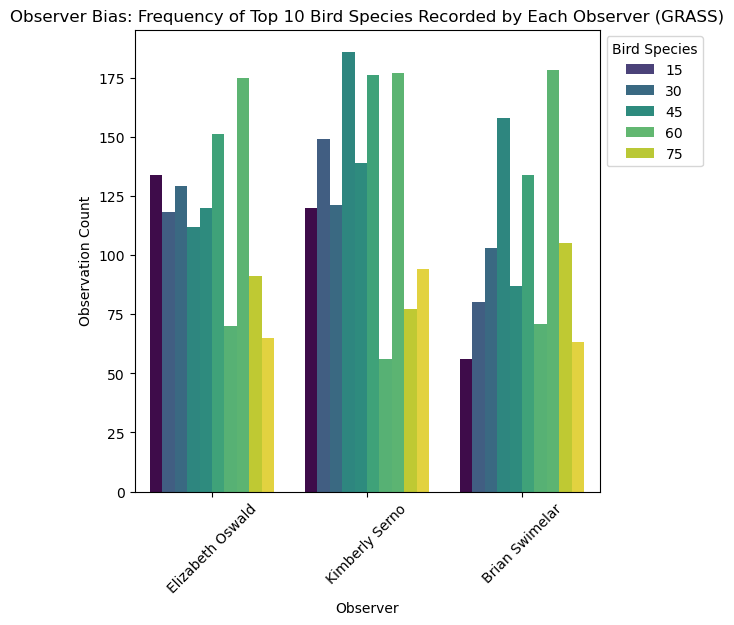

In [57]:
# Plot the observer bias for these top species
plt.figure(figsize=(6, 6))
sns.countplot(data=filtered_df, x="Observer", hue="Common_Name", palette="viridis")

# Formatting the plot
plt.title("Observer Bias: Frequency of Top 10 Bird Species Recorded by Each Observer (GRASS)")
plt.xlabel("Observer")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.legend(title="Bird Species", bbox_to_anchor=(1, 1))
plt.show()

### b. Visit Patterns
Evaluate the Visit column to see how repeated visits affect species count or diversity.

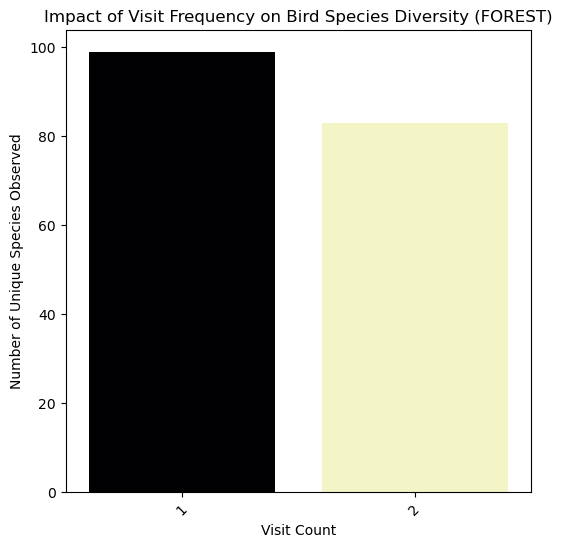

In [58]:
# Forest plot

import seaborn as sns
import matplotlib.pyplot as plt

# Count unique species observed per Visit
visit_species_count = Forest.groupby("Visit")["Common_Name"].nunique().reset_index()

# Rename for clarity
visit_species_count.columns = ["Visit", "Unique Species Count"]

# Plot
plt.figure(figsize=(6, 6))
sns.barplot(data=visit_species_count, x="Visit", y="Unique Species Count", hue="Visit", palette="magma", errorbar=None, legend=False)

# Formatting
plt.title("Impact of Visit Frequency on Bird Species Diversity (FOREST)")
plt.xlabel("Visit Count")
plt.ylabel("Number of Unique Species Observed")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



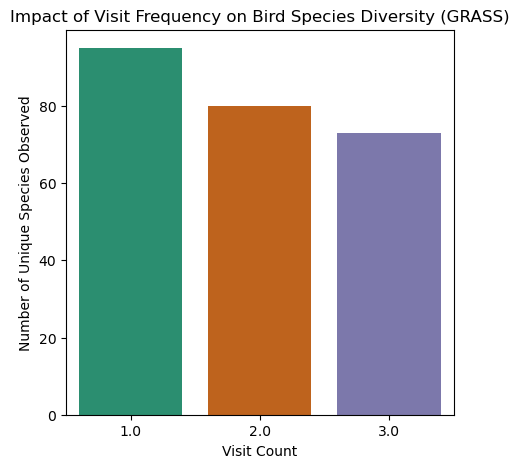

In [59]:
#grassland plot 
import seaborn as sns
import matplotlib.pyplot as plt

# Count unique species observed per Visit
visit_species_count = Grass.groupby("Visit")["Common_Name"].nunique().reset_index()

# Rename for clarity
visit_species_count.columns = ["Visit", "Unique Species Count"]

# Plot
plt.figure(figsize=(5, 5))
sns.barplot(data=visit_species_count, x="Visit", y="Unique Species Count", hue="Visit", palette="Dark2", legend=False)

# Formatting
plt.title("Impact of Visit Frequency on Bird Species Diversity (GRASS)")
plt.xlabel("Visit Count")
plt.ylabel("Number of Unique Species Observed")
plt.show()


## 7. Conservation Insights

### a. Watchlist Trends
Use the PIF_Watchlist_Status and Regional_Stewardship_Status to identify trends in species that are at risk or require conservation focus.

In [65]:
#Forest Data

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Count the occurrences of each status in PIF_Watchlist_Status
watchlist_counts = Forest["PIF_Watchlist_Status"].value_counts().reset_index()
watchlist_counts.columns = ["Status", "Count"]

# Count the occurrences of each status in Regional_Stewardship_Status
stewardship_counts = Forest["Regional_Stewardship_Status"].value_counts().reset_index()
stewardship_counts.columns = ["Status", "Count"]

# Create subplots (2 bar charts side by side)
fig = make_subplots(
    rows=1, cols=2, 
    subplot_titles=("PIF Watchlist Status Trends (FOREST)", "Regional Stewardship Status Trends (FOREST)"),
    shared_yaxes=True
)

# PIF Watchlist Status Bar Plot
fig.add_trace(
    go.Bar(
        x=watchlist_counts["Status"],
        y=watchlist_counts["Count"],
        marker_color='yellowgreen',  # Change color as per the palette
        name="PIF Watchlist Status"
    ),
    row=1, col=1
)

# Regional Stewardship Status Bar Plot
fig.add_trace(
    go.Bar(
        x=stewardship_counts["Status"],
        y=stewardship_counts["Count"],
        marker_color='lightcoral',  # Change color as per the palette
        name="Regional Stewardship Status"
    ),
    row=1, col=2
)

# Update Layout
fig.update_layout(
    title="Watchlist and Stewardship Status Trends (FOREST)",
    xaxis_title="Status",
    yaxis_title="Species Count",
    showlegend=True,
    height=500,  # Adjust height for better spacing
    width=1000  # Increase width for better layout of both plots
)

# Show the plot
fig.show()


In [66]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Count the occurrences of each status in PIF_Watchlist_Status
watchlist_counts = Grass["PIF_Watchlist_Status"].value_counts().reset_index()
watchlist_counts.columns = ["Status", "Count"]

# Count the occurrences of each status in Regional_Stewardship_Status
stewardship_counts = Grass["Regional_Stewardship_Status"].value_counts().reset_index()
stewardship_counts.columns = ["Status", "Count"]

# Create subplots (2 bar charts side by side)
fig = make_subplots(
    rows=1, cols=2, 
    subplot_titles=("PIF Watchlist Status Trends (GRASS)", "Regional Stewardship Status Trends (GRASS)"),
    shared_yaxes=True
)

# PIF Watchlist Status Bar Plot
fig.add_trace(
    go.Bar(
        x=watchlist_counts["Status"],
        y=watchlist_counts["Count"],
        marker_color='purple',  # Change color as per the palette
        name="PIF Watchlist Status"
    ),
    row=1, col=1
)

# Regional Stewardship Status Bar Plot
fig.add_trace(
    go.Bar(
        x=stewardship_counts["Status"],
        y=stewardship_counts["Count"],
        marker_color='pink',  # Change color as per the palette
        name="Regional Stewardship Status"
    ),
    row=1, col=2
)

# Update Layout
fig.update_layout(
    title="Watchlist and Stewardship Status Trends (GRASS)",
    xaxis_title="Status",
    yaxis_title="Species Count",
    showlegend=True,
    height=500,  # Adjust height for better spacing
    width=1000  # Increase width for better layout of both plots
)

# Show the plot
fig.show()


### b. AOU Code Patterns
Study the distribution of species based on their AOU_Code to correlate with regional or national conservation priorities.

In [ ]:
# Forest plot

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Count the occurrences of each AOU Code
aou_counts = Forest["AOU_Code"].value_counts().reset_index()
aou_counts.columns = ["AOU_Code", "Count"]

# Select the top 20 most observed species by AOU Code
top_aou_counts = aou_counts.head(20)

# Create the bar plot
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=top_aou_counts["AOU_Code"],
        y=top_aou_counts["Count"],
        marker_color='rgb(69, 123, 157)',  # Mako color palette
        name="AOU Code Distribution"
    )
)

# Update Layout
fig.update_layout(
    title="Top 20 Most Observed Species by AOU Code (FOREST)",
    xaxis_title="AOU Code",
    yaxis_title="Observation Count",
    xaxis_tickangle=45,  # Rotate x-axis labels for better readability
    showlegend=True,
    height=500,  # Adjust height for better spacing
    width=800  # Adjust width for clarity
)

# Show the plot
fig.show()


In [ ]:
#Grassland Plot

import plotly.graph_objects as go

# Count the occurrences of each AOU Code
aou_counts = Grass["AOU_Code"].value_counts().reset_index()
aou_counts.columns = ["AOU_Code", "Count"]

# Select the top 20 most observed species by AOU Code
top_aou_counts = aou_counts.head(20)

# Create the bar plot
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=top_aou_counts["AOU_Code"],
        y=top_aou_counts["Count"],
        marker_color='rgb(69, 123, 157)',  # Mako color palette
        name="AOU Code Distribution"
    )
)

# Update Layout
fig.update_layout(
    title="Top 20 Most Observed Species by AOU Code (GRASS)",
    xaxis_title="AOU Code",
    yaxis_title="Observation Count",
    xaxis_tickangle=45,  # Rotate x-axis labels for better readability
    showlegend=False,
    height=500,  # Adjust height for better spacing
    width=800  # Adjust width for clarity
)

# Show the plot
fig.show()


## 8. Distribution and Frequency ANalysis

In [69]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Concatenate Forest and Gross datasets
df = pd.concat([Forest, Grass], ignore_index=True)

# Convert categorical weather conditions to proper types
df['Sky'] = df['Sky'].astype(str)
df['Wind'] = df['Wind'].astype(str)

# Create subplots (2 rows, 2 columns)
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Temperature Distribution", "Humidity Distribution", "Sky Condition Frequency", "Wind Condition Frequency")
)

# Plot Temperature Distribution (Histogram)
fig.add_trace(
    go.Histogram(
        x=df['Temperature'],
        nbinsx=20,
        marker_color='green',
        name="Temperature Distribution",
        histnorm='probability density',  # Optionally add kde-like effect
    ),
    row=1, col=1
)

# Plot Humidity Distribution (Histogram)
fig.add_trace(
    go.Histogram(
        x=df['Humidity'],
        nbinsx=20,
        marker_color='blue',
        name="Humidity Distribution",
        histnorm='probability density',  # Optionally add kde-like effect
    ),
    row=1, col=2
)

# Plot Sky Condition Frequency (Bar Plot)
fig.add_trace(
    go.Bar(
        x=df["Sky"].value_counts().index,
        y=df["Sky"].value_counts(),
        marker_color='rgb(69, 123, 157)',  # Custom color
        name="Sky Condition Frequency"
    ),
    row=2, col=1
)

# Plot Wind Condition Frequency (Bar Plot)
fig.add_trace(
    go.Bar(
        x=df["Wind"].value_counts().index,
        y=df["Wind"].value_counts(),
        marker_color='rgb(31, 119, 180)',  # Custom color
        name="Wind Condition Frequency"
    ),
    row=2, col=2
)

# Update Layout
fig.update_layout(
    title="Weather Conditions Distribution and Frequency Analysis",
    showlegend=False,  # No need for a legend in this case
    height=800,  # Adjust height for clarity
    width=1000,  # Adjust width for layout
    xaxis_title="Temperature",
    yaxis_title="Density",
    xaxis2_title="Humidity",
    yaxis2_title="Density",
    xaxis3_title="Sky Condition",
    yaxis3_title="Count",
    xaxis4_title="Wind Condition",
    yaxis4_title="Count",
)

# Show the plot
fig.show()
